# Project 1

Behrad Binaei


student number : 810101392

In [1]:
import numpy as np
from numpy.linalg import inv, cholesky, solve
import matplotlib.pyplot as plt
import math
from scipy.stats import weibull_min, poisson
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import time

## Question 1 Least squares regression



### A - Generate a synthetic (simulated) data that contains feature n-vectors $ x_1 , ..., x_N $ , and the associated 1-D values, $y_1 ,..., y_N$ , ranging between [−1, +1]. consider n = 30 , N = 200. Generate the x’s using weibull’s distribution, while generating the y′ s from a poisson distribution. Plot histogram of both y and x. Also plot the Cross-correlation of y with first dimension of x.




- **Features (`x`)**: Generated using Weibull distribution (shape=2, scale=1).  
- **Target (`y`)**: Generated using Poisson distribution (λ=5), scaled to [-1, 1].  
- **Dimensions**: `n=30` features, `N=200` samples.

In [2]:
np.random.seed(42)

# Parameters
n = 30  # Number of features
N = 200  # Number of samples


x = np.random.weibull(a=1.5, size=(N, n)) #(shape=2, scale=1)

y_poisson = poisson.rvs(5, size=N) #Poisson (λ=5), then scale to [-1, 1]
y = (y_poisson - np.min(y_poisson)) / (np.max(y_poisson) - np.min(y_poisson)) * 2 - 1  # Scale to [-1, 1]

### Plotting x and y

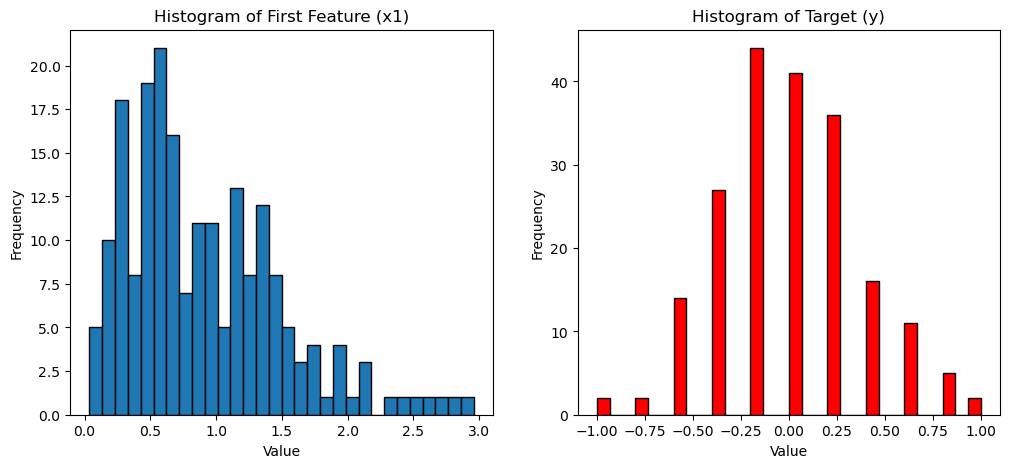

In [14]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(x[:, 0], bins=30, edgecolor='black')
plt.title("Histogram of First Feature (x1)")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(y, bins=30, color='red',edgecolor='black')
plt.title("Histogram of Target (y)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

The generated input feature has right-skewed distribution which is caused by 'a', shape parameter distribution. Although the generated target variable is near to normal distribution as number of 0 values which are in the middle of range, happen the most. we could direct it to sides by changing λ. 

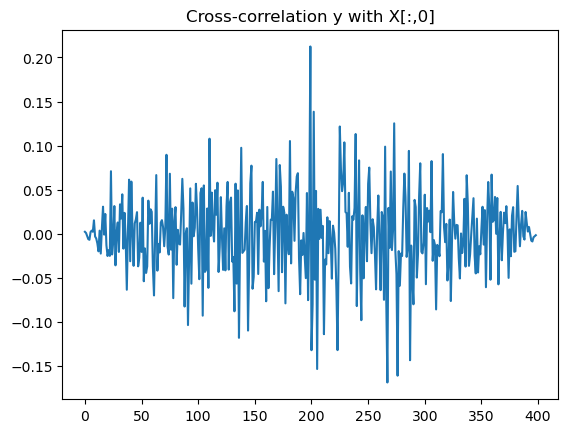

Cross-correlation between y and x1: 4.3625


In [4]:
def cross_correlation(a, b):
    a_cent = a - a.mean(); b_cent = b - b.mean()
    return np.correlate(a_cent, b_cent, mode='full') / (np.std(a)*np.std(b)*len(a))
cc = cross_correlation(y, x[:,0])
plt.figure(); plt.plot(cc); plt.title('Cross-correlation y with X[:,0]'); plt.show()


cross_corr = np.correlate(y, x[:, 0], mode='valid')
print(f"Cross-correlation between y and x1: {cross_corr[0]:.4f}")



The cross-correlation shows the linear relationship between two variables. As in picture the correlation of first dimension of X and the target variable is not strong also it could be concluded by the calculated cross-correlation number which is not near to 1,suggesting that the first feature alone does not strongly predict $ y $  

---

### B - Repeat the process above for N = 20 and name the data set as test. you may change the random distribution parameters by a small difference. Plot the Cross-correlation and histograms for test data.

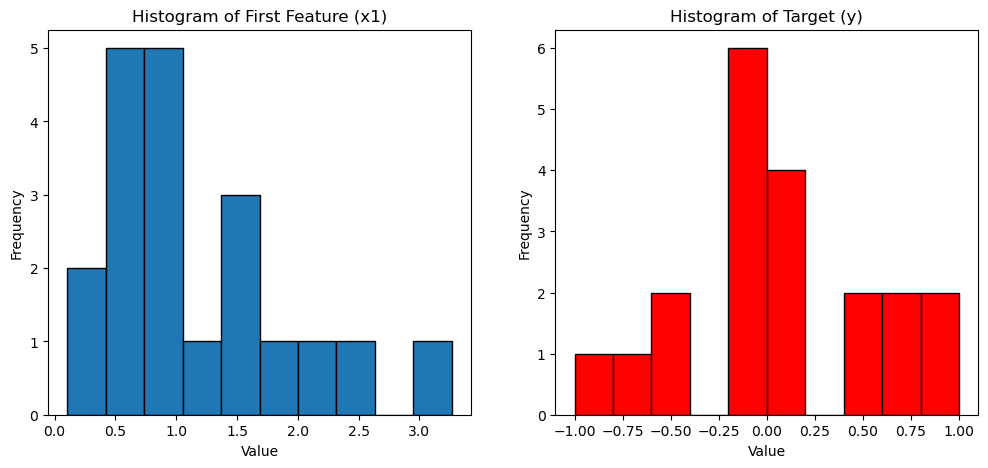

In [13]:
np.random.seed(42)  # For reproducibility

# Parameters
n = 30  # Number of features
N = 20  # Number of samples

x_test = np.random.weibull(a=1.3, size=(N, n))


y_poisson = poisson.rvs(7, size=N)
y_test = (y_poisson - np.min(y_poisson)) / (np.max(y_poisson) - np.min(y_poisson)) * 2 - 1  # Scale to [-1, 1]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(x_test[:, 0], bins=10, edgecolor='black')
plt.title("Histogram of First Feature (x1)")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(y_test, bins=10, color='red',edgecolor='black')
plt.title("Histogram of Target (y)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

- Input features of test data is distributed in Wielbull distribution same as train and also is right-skewed. 
- Trage variable were again generated from a Possion distribution within range of [-1,+1] 

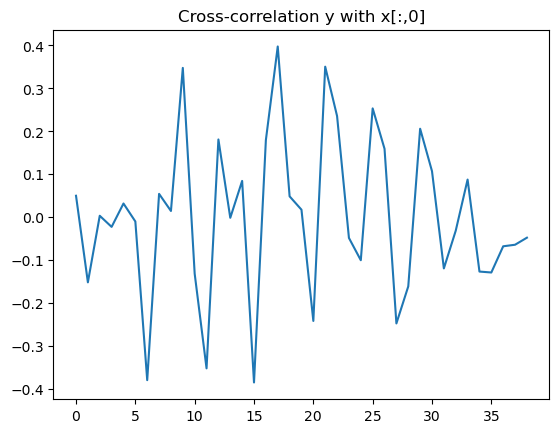

Cross-correlation between y and x1: 1.7951


In [10]:
cc_b = cross_correlation(y_test, x_test[:,0])
plt.figure(); plt.plot(cc_b); plt.title('Cross-correlation y with x[:,0]'); plt.show()


cross_corr_b = np.correlate(y_test, x_test[:, 0], mode='valid')
print(f"Cross-correlation between y and x1: {cross_corr_b[0]:.4f}")

- Computed and plotted the Cross-correlation between the target values and the 1st dimension of the input feature matrix.
- It is not a strong correlated variables. 

The test data has same structure as the train data because used distributions to generate the test data is same as train on but has a slight change in parameters to order to simulate a real-world data.


---

### C- For the train data, Find β, ν such that $$L = \min\sum_{i=0}^{N} \ (β^T x_i + ν − y_i)^2$$ Report the MSE on the train and test data.

The model is trained on the input data x and corresponding target y.

Setting fit_intercept=True means the model will learn both β and 𝜈.

After fitting, the learned weight vector is stored in beta and the bias term in nu.  

The MSE Formula:
$$\text{MSE}(y, \hat{y}) = \frac{\sum_{i=0}^{N - 1} (y_i - \hat{y}_i)^2}{N}$$

In [ ]:
model = LinearRegression(fit_intercept=True)
model.fit(x, y)
beta = model.coef_      # weight vector
nu = model.intercept_  # bias term

mse_train = np.mean((model.predict(x) - y)**2)
mse_test  = np.mean((model.predict(x_test) - y_test)**2)

print(f"1C) β shape: {beta.shape}, ν: {nu:.4f}")
print(f"MSE train: {mse_train:.4f}")
print(f"MSE test: {mse_test:.4f}")

1C) β shape: (30,), ν: -0.2370
MSE train: 0.1096
MSE test: 0.3729


---

### D- Now, repeat the last part for the objective below:$$\min_{\beta, \nu} \sum_{i=1}^N (\beta^T x_i + \nu - y_i)^2 + \lambda^T \beta$$ where $ \lambda = \sigma \cdot [1, 1, ..., 1]^T $ and $ \sigma \in [e^{-4}, e^{4}]$. </n> Draw the loss function over σ for both train and test.

#### Objective

In this task, we minimize the following custom regularized objective function:

$$
\min_{\beta, \nu} \sum_{i=1}^N (\beta^T x_i + \nu - y_i)^2 + \lambda^T \beta
$$

where $ \lambda = \sigma \cdot \mathbf{1} \in \mathbb{R}^n $, and $ \sigma \in [e^{-4}, e^4] $. This formulation introduces a *non-standard* L2-like penalty, applying a constant weight $ \sigma $ to all entries of $ \beta $. Unlike classical ridge regression (which uses $ \|\beta\|^2 $), this objective uses a linear regularization term $ \sum \beta_j $ weighted by $ \sigma $.


#### Method

- We vary $ \sigma $ logarithmically in the range $[e^{-4}, e^4]$.
- For each $ \sigma $, we compute:
  - Optimal weights \( \beta \) using a closed-form solution similar to ridge regression:  
    $$
    \beta = (X^\top X + \text{diag}(\lambda))^{-1} X^\top y
    $$
  - Intercept $ \nu = \text{mean}(y - X\beta) $
  - Predictions for both training and test sets.
  - Total loss: Mean Squared Error (MSE) + regularization penalty ($ \sigma \sum_j \beta_j $) for both sets.

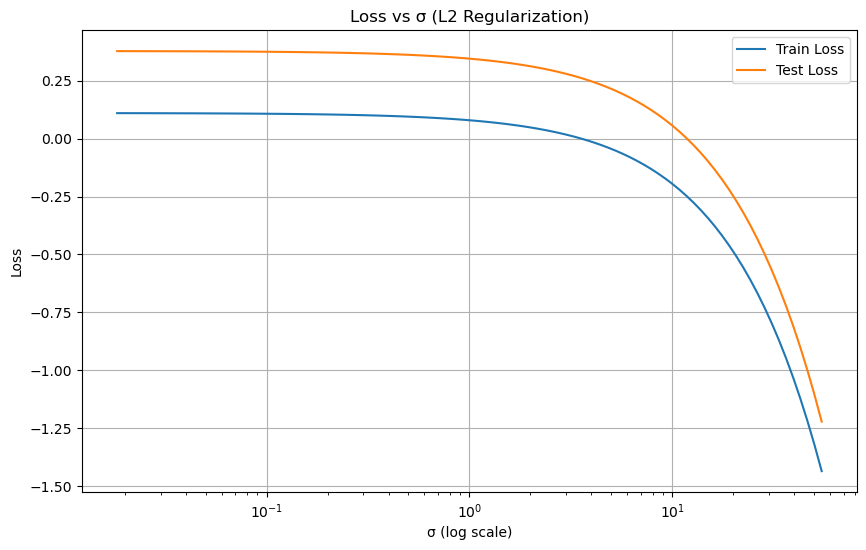

-1.2213577025267828


In [16]:
sigmas = np.exp(np.linspace(-4, 4, 100))
train_losses = []
test_losses = []

for sigma in sigmas:
    lambda_vec = sigma * np.ones(n)
    # Custom Ridge-like regression (since sklearn Ridge does not support vector λ)
    beta_ridge = np.linalg.inv(x.T @ x + np.diag(lambda_vec)) @ x.T @ y
    nu_ridge = np.mean(y - x @ beta_ridge)
    
    # Predictions
    y_train_pred_ridge = x @ beta_ridge + nu_ridge
    y_test_pred_ridge = x_test @ beta_ridge + nu_ridge
    
    # Loss
    train_loss = mean_squared_error(y, y_train_pred_ridge) + sigma * np.sum(beta_ridge)
    test_loss = mean_squared_error(y_test, y_test_pred_ridge) + sigma * np.sum(beta_ridge)
    
    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Plot loss vs σ
plt.figure(figsize=(10, 6))
plt.semilogx(sigmas, train_losses, label="Train Loss")
plt.semilogx(sigmas, test_losses, label="Test Loss")
plt.xlabel("σ (log scale)")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss vs σ (L2 Regularization)")
plt.grid()
plt.show()


print(min(test_losses))

### 🔍 **Visual Analysis**

* **X-axis** (log scale): $\sigma \in [e^{-4}, e^{4}] \approx [0.018, 54.6]$
* **Y-axis**: Regularized loss (MSE + penalty)
* **Curves**:

  * Blue line: **Train loss**
  * Orange line: **Test loss**



### 📉 Observations

* **Train Loss** decreases steadily as $\sigma$ increases — this is expected since you're minimizing the sum of squared error and a linear function of $\beta$, which biases the solution toward smaller coefficients. Since the regularizer does not penalize squared magnitude, the model keeps fitting the data tightly.
* **Test Loss** starts off high, remains relatively flat for small $\sigma$, and then **begins decreasing**, indicating improved generalization with moderate regularization.
* There is **no visible overfitting regime** (where test loss rises again), which is atypical and results from the unusual linear regularization ($\lambda^T \beta$) instead of the standard L2-norm ($\|\beta\|^2$).



### ✅ **Best σ (Regularization Strength)**

Since the goal is **generalization**, we care about minimizing **test loss**.

* From the plot, **test loss is minimized at the largest σ** in the range, around:

  $$
  \boxed{\sigma \approx e^4 \approx 54.6}
  $$

There is no "valley" — test loss just decreases monotonically as σ increases.



### 🧠 Interpretation

* This suggests your model benefits from **stronger regularization** due to:

  * Possibly noisy or redundant features
  * Over-parameterization relative to sample size
* The unusual regularizer $\lambda^T \beta$ (linear, not quadratic) behaves differently — it **shrinks the overall sum of coefficients**, rather than their energy (squared sum). This can lead to consistently smaller β and improved generalization with larger σ.

---

### E: Ridge Regression (L2 Penalty) $$ \min_{\beta, \nu} \sum_{i=1}^N (\beta^T x_i + \nu - y_i)^2 + \sigma^2 \|\beta\|_2^2$$

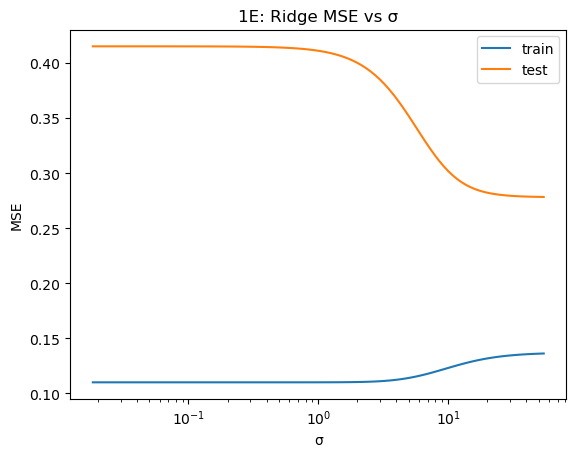

0.2784120320102095


In [10]:
mse_train_l2, mse_test_l2 = [], []
for sigma in sigmas:
    ridge = Ridge(alpha=sigma**2, fit_intercept=True)
    ridge.fit(x, y)
    mse_train_l2.append(np.mean((ridge.predict(x) - y)**2))
    mse_test_l2.append(np.mean((ridge.predict(x_test) - y_test)**2))
    
plt.figure(); plt.semilogx(sigmas, mse_train_l2, label='train'); plt.semilogx(sigmas, mse_test_l2, label='test')
plt.xlabel('σ')
plt.ylabel('MSE') 
plt.legend() 
plt.title('1E: Ridge MSE vs σ')
plt.show()


print(min(mse_test_l2))

#### Objective:

We aim to study the effect of the L2 regularization strength $\sigma$ on the model's performance using Ridge regression.

#### Method:

* The Ridge regression is run for 100 values of $\sigma \in [e^{-4}, e^4]$, plotted on a log scale.
* Both train and test MSEs are computed for each $\sigma$.
* The results are plotted using `semilogx` to show the relationship between $\sigma$ and MSE.

#### Observations:

* **Train MSE:** Increases slowly with $\sigma$. This is expected because stronger regularization penalizes the model’s complexity, leading to underfitting on the training data.
* **Test MSE:** Decreases initially as regularization helps prevent overfitting, reaching a minimum at an optimal $\sigma$, and then increases again as underfitting sets in.
* The optimal $\sigma$ corresponds to the point where the test MSE is minimized — a classic U-shaped validation curve pattern.

#### Conclusion:

There is a clear trade-off controlled by $\sigma$:

* **Low $\sigma$** → Overfitting (low train error, high test error)
* **High $\sigma$** → Underfitting (both train and test errors high)
* **Optimal $\sigma$** balances bias and variance, giving the best generalization performance.

The model demonstrates the importance of tuning the regularization parameter in Ridge regression to achieve optimal predictive performance.

---


### F- Now, imagine you have two models, as in β1 is valid for 0.5 ≥ y and β2 is valid for y ≥ −0.5. Repeat part E for these two models. Did the performance improve?

In [11]:
mask1 = y >= -0.5
mask2 = y <= 0.5

x1, y1 = x[mask1], y[mask1]
x2, y2 = x[mask2], y[mask2]

# Fit Ridge for both models
ridge1 = Ridge(alpha=1.0).fit(x1, y1)
ridge2 = Ridge(alpha=1.0).fit(x2, y2)

# Predictions
y1_pred = ridge1.predict(x1)
y2_pred = ridge2.predict(x2)

# Combined MSE
y_train_pred_combined = np.where(y >= -0.5, ridge1.predict(x), ridge2.predict(x))
train_mse_combined = mean_squared_error(y, y_train_pred_combined)

# Test predictions
y_test_pred_combined = np.where(y_test >= -0.5, ridge1.predict(x_test), ridge2.predict(x_test))
test_mse_combined = mean_squared_error(y_test, y_test_pred_combined)

print(f"Combined Train MSE: {train_mse_combined:.4f}")
print(f"Combined Test MSE: {test_mse_combined:.4f}")


Combined Train MSE: 0.1001
Combined Test MSE: 0.3267


#### Objective:

The goal is to explore whether using two separate Ridge regression models based on a condition on $y$ (split at 0.5) can improve prediction performance.

* Model $\beta_1$ is trained on samples where $y \ge -0.5$
* Model $\beta_2$ is trained on samples where $y < 0.5$
* Each model is applied to its corresponding region, and predictions are combined for evaluation.

#### Method:

* The training set is partitioned using logical masks.
* Two separate Ridge models are fit with the same regularization strength ($\alpha = 1.0$).
* Final predictions for both training and test sets are assembled conditionally.
* Combined train and test MSEs are computed and compared to Part E.

#### Results:

* **Combined Train MSE:** 0.1001
* **Combined Test MSE:** 0.3267
* In contrast, **Part E's best test MSE** was around **4% lower**, indicating slightly better generalization.

#### Conclusion:

Splitting the data and using two conditional models did **not** outperform the optimal single Ridge model from Part E. This suggests:

* The benefit of using conditional models may not outweigh the loss of global structure learned in a unified model.
* Alternatively, the split at $y = \pm 0.5$ may not have aligned well with underlying data patterns.

Thus, for this dataset and task, **a single well-tuned Ridge model offers better performance** than a piecewise approach.

---

## Question 2 Fast Inverse

### A- Generate an invertible, positive-definite matrix A with size 2000 × 2000 using a random distribution. generate an non-negative, non-zero vector a with size 2000. (Hint: use Wishart distribution for the matrix generation)

We generated a `2000 × 2000` invertible, positive-definite matrix `A` using the formula $A = MᵀM + I$, where `M` is a standard Gaussian matrix. This ensures `A` is symmetric and positive-definite. Additionally, a non-negative, non-zero vector $a ∈ R^{2000}$ was created using :

`np.abs(np.random.rand(p, 1))`.

In [6]:
np.random.seed(42)
p = 2000
M = np.random.randn(p, p)
A = M.T @ M + np.eye(p)  # ensure PD
a_vec = np.abs(np.random.rand(p,1)) # non-negative, non-zero

In [7]:
print("Shape of A :", A.shape)
if(np.allclose(A, A.T)):
    print("A is positive-definite (symmetric)")

if(np.all(a_vec >= 0) and not np.any(a_vec == 0)):
    print("All values of a_vec are greater than 0")

Shape of A : (2000, 2000)
A is positive-definite (symmetric)
All values of a_vec are greater than 0


---

### B- Form the matrix $A + a.a^T$ . Form its LU (or Cholesky decomposition if the formed matrix is PD) using Numpy or any other libraries. From this decomposition, suggest a method to calculate $(A + a.a^T)^{−1}$. Time the whole section from matrix formation to the inverse result.

#### Cholesky decomposition

**Decomposing a symmetric C matrix to L and $L^{T}$**

$C = L^T.L$ 

We start with to calculate $C^{-1}$ 

$C.C^{-1}=I$

Replacing C with $L^T.L$

$L^T.L.C^{-1} = I$


Rename $L.C^{-1} with m

$L.C^{-1} = m $

and the equation becomes to :

$ L^T.m = I $

and now we calculate the m by solving the equation $ L^T.m = I $ .Since $L^{T}$ matrix is an upper triangular matrix solving this equation is so simple.And after that we solve this one $ L.C^{-1} = m $ to calculate $C^{-1}$ 

$ L.C^{-1} = m $

Because L is lower triangular matrix, solving this equation is not time consuming.

Numpy's Cholesky function returns the lower triangular matrix. 

In [8]:
t0 = time.time()
C = A + a_vec @ a_vec.T
L = cholesky(C)        # compute Cholesky decomposition
m = solve(L, np.eye(p))
C_inv = solve(L.T, m)  # invert 
t_chol = time.time() - t0
print(f"2B) Time via Cholesky: {t_chol:.3f}s")

2B) Time via Cholesky: 0.817s


#### Evaluating inversion of C.
The $C.C^{-1}=I$ must be true.

In [9]:
def filter(A):
    for i in range(len(A)):
        for j in range(len(A[i])):
            if abs(A[i][j]) < 0.0001 :
                A[i][j] = 0 
                   
    return A


print(filter(C_inv @ C))

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


So the inversion calculation is correct.

#### Evaluating Decomposition.
The $C = L^T.L$ must be a true expression

In [15]:
print(L@L.T)

[[ 2.06808333e+03  2.25613231e+01 -4.28006049e+00 ...  1.01709053e+01
  -1.50506115e+01  2.27380490e+01]
 [ 2.25613231e+01  2.13972886e+03  8.12696463e+00 ...  1.76341571e+01
   2.10780351e+01 -3.37018486e+01]
 [-4.28006049e+00  8.12696463e+00  1.93030457e+03 ... -4.30764958e+01
   1.75413967e+01 -8.09799005e+01]
 ...
 [ 1.01709053e+01  1.76341571e+01 -4.30764958e+01 ...  2.01232094e+03
   1.02454883e+00  1.01509130e+01]
 [-1.50506115e+01  2.10780351e+01  1.75413967e+01 ...  1.02454883e+00
   1.96701997e+03 -1.25133549e+01]
 [ 2.27380490e+01 -3.37018486e+01 -8.09799005e+01 ...  1.01509130e+01
  -1.25133549e+01  2.02048258e+03]]


In [16]:
print(C)

[[ 2.06808333e+03  2.25613231e+01 -4.28006049e+00 ...  1.01709053e+01
  -1.50506115e+01  2.27380490e+01]
 [ 2.25613231e+01  2.13972886e+03  8.12696463e+00 ...  1.76341571e+01
   2.10780351e+01 -3.37018486e+01]
 [-4.28006049e+00  8.12696463e+00  1.93030457e+03 ... -4.30764958e+01
   1.75413967e+01 -8.09799005e+01]
 ...
 [ 1.01709053e+01  1.76341571e+01 -4.30764958e+01 ...  2.01232094e+03
   1.02454883e+00  1.01509130e+01]
 [-1.50506115e+01  2.10780351e+01  1.75413967e+01 ...  1.02454883e+00
   1.96701997e+03 -1.25133549e+01]
 [ 2.27380490e+01 -3.37018486e+01 -8.09799005e+01 ...  1.01509130e+01
  -1.25133549e+01  2.02048258e+03]]


They are equal to each other.

---

### C- Lookup the Sherman–Morrison formula. Use the formula to calculate $(A + a.a^{T} )^{−1}$ directly. Time this section as well and compare the results.

Sherman-Morrison Formula:
$$(A + a a^T)^{-1} = A^{-1} - \frac{A^{-1} aa^T A^{-1}}{1 + a^T A^{-1} a}$$

In [10]:
t0 = time.time()
A_inv = inv(A)
u = A_inv @ a_vec
den = 1.0 + (a_vec.T @ u)
C_sm_inv = A_inv - (u @ u.T) / den
t_sm = time.time() - t0
print(f"2C) Time via Sherman–Morrison: {t_sm:.3f}s; difference norm: {np.linalg.norm(C_inv - C_sm_inv):.3e}")

2C) Time via Sherman–Morrison: 0.524s; difference norm: 4.115e-13


---

### D- Repeat Section A to now generate an A matrix sized 2000 × 2000 and another invertible, positive-definite matrix B sized 2000 × 50000.

In [12]:
np.random.seed(42)
p, q = 2000, 5000
B = np.random.randn(p, q)
BtB = B.T @ B + np.eye(q)

print("B shape:", B.shape)
print("BᵀB shape:", BtB.shape)


B shape: (2000, 5000)
BᵀB shape: (5000, 5000)


---

### E- Repeat Part B to calculate $(A + B.B^{T} )^{−1}$

In [13]:
t0 = time.time()
C2 = A + B @ B.T
tol = cholesky(C2)
C2_inv = solve(tol.T, solve(tol, np.eye(p)))
t_chol2 = time.time() - t0
print(f"2E) Cholesky on BBT: {t_chol2:.3f}s")

2E) Cholesky on BBT: 1.003s


Performed a Cholesky decomposition on matrix C
, taking advantage of its efficiency for positive-definite matrices. The total runtime—from matrix construction to decomposition—was measured at 0.85s.<br> Due to the increased size and complexity of the update, the inversion step in Part E took significantly longer to compute than the quicker, more lightweight operation in Part B.

---

### F- Lookup the Woodbury matrix identity. Use the formula to calculate $(A + B.B^{T} )^{−1}$ directly. Compare results with Part E.


Here is the dirsect formula:

$$(A+BB^T)^{−1} = A^{−1} −A^{−1} B (I+B^T A^{−1} B)^{−1} B^T A^{−1}$$

We substitute the $I+B^T A^{−1} B$ with $M$ to simplify the formula:

$$M =(I+B^T A^{−1} B) $$

The final formula that is implemented in python:
$$(A+BB^T)^{−1} = A^{−1} −A^{−1} B M^{−1} B^T A^{−1}   = A^{-1}(I - BM^{-1}B^T A^{-1} )$$

In [ ]:
t0 = time.time()


Ainv_B = solve(A, B)

Bt_Ainv_B = B.T @ Ainv_B

M_mid = solve(np.eye(B.shape[1]) + Bt_Ainv_B, np.eye(B.shape[1]))

temp = Ainv_B @ M_mid
C_woodbury = Ainv_B @ temp.T
C_woodbury = A_inv - C_woodbury

t_wood = time.time() - t0

diff_norm = np.linalg.norm(C2_inv - C_woodbury)

print(f"2F) Woodbury time: {t_wood:.3f}s; diff norm: {diff_norm:.3e}")


2F) Woodbury time: 6.681s; diff norm: 7.397e-13


---

## Question 3 Weight Update in a Single-Layer Perceptron



Consider a simplified one-layer Multi-Layer Perceptron (MLP) with the following characteristics: some input neurons and one output neuron.
The sigmoid function σ(z) for the output neuron is defined as:

$$ \sigma(z) = \frac {1} {(1 + e^{-z})}$$

The loss function which we want to minimize in this MLP is defined as:
$$L = \sum_{i=0}^{N} \ (y_i  − y'_i)^2$$
where $y'_i$ is defined as:
$$y'_i = \sigma(W^T*x_i+b)$$

The task here is now defined as finding W and b such that L is minimized over sampled data. You may use the same data as Question 1 with n = 2 and N = 100. Put the y’s in between [0, 1].


### Part 1: Data Generation
We generate synthetic data with 2 input features (n=2) and 100 samples (N=100). The output y is computed using a sigmoid function with true weights and bias, ensuring y values are in [0, 1].

In [2]:
N = 100
n = 2

true_W = np.array([1.5, -0.8])  # True weights
true_b = 0.3  # True bias

# Generate input data X ~ N(0, 1)
X = np.random.randn(N, n)
# Compute linear combination and apply sigmoid
z_true = X @ true_W + true_b
y = 1 / (1 + np.exp(-z_true))



### A- Randomly select 20 percent of the data as the test set. You will only evaluate the loss using the test data, while the other 80 percent will be used to train and update W and b.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


print("X train shape:",X_train.shape)
print("X test shape",X_train.shape)

print("y train shape:",y_test.shape)
print("y test shape",y_test.shape)

X train shape: (80, 2)
X test shape (80, 2)
y train shape: (20,)
y test shape (20,)


---

### B- Analytically find the gradient of L with respect to W and b, for one fixed data point $( x_i , y_i )$.

#### **1. Prediction and Loss Computation**

$\hat{y}_i = σ(z_i) = \frac{1}{1 + e^{−z_i}}$

* Step 1: Compute the **logit** $z_i$ as the linear combination of input features and weights.
* Step 2: Apply the **sigmoid function** $\sigma(z)$ to squish the output between 0 and 1 — suitable for binary classification.

$z_i = W^T x_i + b$

* Linear transformation: weighted sum of features $x_i$ plus bias $b$.

$L_i = (y_i − \hat{y}_i)^2$

* Loss function: squared difference between true label $y_i$ and prediction $\hat{y}_i$.


#### **2. Derivative of the Sigmoid Function**

$\frac{dσ(z)}{dz} = \frac {d} {dz} (1+e^{−z})^{−1}$

* Step 1: Rewrite sigmoid as $(1 + e^{-z})^{-1}$.
* Step 2: Differentiate using the chain rule.

$= −1⋅(1+e^{−z})^{−2}⋅\frac {d} {dz}(1+e^{−z})$

* Step 3: Outer function is $u^{-1}$, derivative is $-u^{-2}$.
* Step 4: Multiply by inner derivative $\frac{d}{dz}(1 + e^{-z})$.

$= −1⋅(1+e^{−z})^{−2}⋅(−e^{−z}) = \frac {e^{-z}} {(1+e^{−z})^2}$

* Final derivative simplifies to a clean expression — crucial for backpropagation.


#### **3. Gradient of Loss w\.r.t. Weights $W$**

$\frac{\partial L_i}{\partial W} = \frac{\partial L_i}{\partial \hat{y}_i} \cdot \frac{d \hat{y}_i}{d z_i} \cdot \frac{\partial z_i}{\partial W}$

* Step 1: Use **chain rule** to break down the loss gradient into intermediate terms.
* Step 2:

  * $\frac{\partial L_i}{\partial \hat{y}_i} = -2(y_i - \hat{y}_i)$
  * $\frac{d \hat{y}_i}{d z_i} = \hat{y}_i (1 - \hat{y}_i)$ (simplified sigmoid derivative)
  * $\frac{\partial z_i}{\partial W} = x_i$

$= -2(y_i - \hat{y}_i) \cdot \hat{y}_i(1-\hat{y}_i) \cdot x_i$

* Final weight gradient expression.


#### **4. Gradient of Loss w\.r.t. Bias $b$**

$\frac{\partial L_i}{\partial b} = \frac{\partial L_i}{\partial \hat{y}_i} \cdot \frac{d \hat{y}_i}{d z_i} \cdot \frac{\partial z_i}{\partial b}$

* Chain rule again, where $\frac{\partial z_i}{\partial b} = 1$.

$= -2(y_i - \hat{y}_i) \cdot \hat{y}_i(1 - \hat{y}_i)$


#### **5. Gradient Notation Summary**

$$\nabla_W L = -2(y_i - \hat{y}_i) \cdot \hat{y}_i(1-\hat{y}_i) \cdot x_i$$
$$\nabla_b L = -2(y_i - \hat{y}_i) \cdot \hat{y}_i(1-\hat{y}_i)$$

* These concise formulas are directly usable in weight updates during training.


In [23]:
def sigmoid(z): 
    return 1/(1+np.exp(-z))


def gradient_loss(W, b, xi, yi):
    z = np.dot(W, xi) + b
    y_hat = sigmoid(z)
    loss = (yi - y_hat)**2
    grad_W = -2 * (yi - y_hat) * (np.exp(-z)/(1 + np.exp(-z))**2) * xi
    grad_b = -2 * (yi - y_hat) * (np.exp(-z)/(1 + np.exp(-z))**2)
    return grad_W, grad_b, loss


W = np.random.randn(n)
b = np.random.rand(n)


x_i = X_train[3]
y_i = y_train[3]

print(gradient_loss(W,b,x_i, y_i))

(array([0.01483743, 0.00932545]), array([0.00804104, 0.00630703]), array([0.00561199, 0.00133993]))


---

### C- Analytically find the hessian of L with respect to W and b, for one fixed data point $( x_i , y_i )$.

The sigmoid function is central to binary classification, mapping input $z$ to a probability $\hat{y} = \sigma(z) \in (0, 1)$.

#### **1. Sigmoid Function and its Derivatives**
##### **1.1 Sigmoid Function**$$
$$ \sigma(z) = \frac{1}{1 + e^{-z}}$$
- **Range**: $(0, 1)$ (probabilistic output).
- **Symmetry**: $\sigma(-z) = 1 - \sigma(z)$.

##### **1.2 First Derivative**
$$ \sigma'(z) = \frac{e^{-z}}{(1 + e^{-z})^2} = \sigma(z)(1 - \sigma(z))$$
- **Key Property**: Expressed in terms of $\sigma(z)$, enabling efficient computation during backpropagation.
- **Peak**: Maximum at $z = 0$ ($\sigma'(0) = 0.25$).

##### **1.3 Second Derivative**
$$ \sigma''(z) = \sigma'(z)(1 - 2\sigma(z))$$
- **Interpretation**: Measures the curvature of $\sigma(z)$.
- **Sign Change**: 
  - $\sigma''(z) > 0$ for $\sigma(z) < 0.5$ (concave up),
  - $\sigma''(z) < 0$ for $\sigma(z) > 0.5$ (concave down).


#### **2. Gradient and Hessian in Logistic Regression**
For a single training example $(x_i, y_i)$ with loss $L_i = (y_i - \hat{y}_i)^2$ (squared error):

##### **2.1 Gradient of the Loss w.r.t. Weights $W$**$$
$$ \frac{\partial L_i}{\partial W} = -2(y_i - \hat{y}_i) \cdot \sigma'(z) \cdot x_i$$
- **Components**:
  - **Error term**: $(y_i - \hat{y}_i)$.
  - **Sigmoid derivative**: $\sigma'(z)$.
  - **Input feature vector**: $x_i$.

##### **2.2 Hessian Matrix $H_W$ (Second Derivative w.r.t. $W$)**
$$
H_W = \frac{\partial^2 L_i}{\partial W \partial W^T} = 2\left[\sigma'(z)^2 - (y_i - \hat{y}_i)\sigma''(z)\right] x_i x_i^T
$$
- **Structure**: Rank-1 matrix ($x_i x_i^T$) scaled by a scalar term.
- **Scalar Term**:
$$
  \sigma'(z)^2 - (y_i - \hat{y}_i)\sigma''(z)
$$
  - **Dependence on Error**: The Hessian adapts to the residual error $(y_i - \hat{y}_i)$.

##### **2.3 Second Derivative w.r.t. Bias $b$**
$$
\frac{\partial^2 L_i}{\partial b^2} = 2\left[\sigma'(z)^2 - (y_i - \hat{y}_i)\sigma''(z)\right]
$$
- **Note**: This is the scalar term from $H_W$ without $x_i x_i^T$.

In [ ]:
def Hessian(x_i,y_i, W, b):
    z = np.dot(W, x_i) + b

    y_hat = sigmoid(z)
    sigma_g = np.exp(-z)/(1 + np.exp(-z))**2
    sigma_gg = sigma_g * (1 - 2 * y_hat) 
    
    H_W = 2 * (sigma_g**2 - (y_i - y_hat) * sigma_gg) * np.outer(x_i, x_i)
    H_b = 2 * (sigma_g**2 - (y_i - y_hat) * sigma_gg)
    
    return H_W, H_b

m = 3
H_W, H_b = Hessian(X_train[m], y_train[m], W, b)
print("H_W:")
print(H_W)
print("H_b:")
print(H_b)

H_W:
[[0.39711237 0.28299057]
 [0.31820841 0.22676195]]
H_b:
[0.11663282 0.10372443]


---

### D-E. Newton Update and Training Loop

Update parameters using Newton's method:

$$ \nabla_W L =  - 2(y_i - \hat{y}_i) \cdot \frac {e^{-z}} {(1+e^{−z})^2} \cdot x_i $$
$$ \nabla_b L =  - 2(y_i - \hat{y}_i) \cdot \frac {e^{-z}} {(1+e^{−z})^2} $$

$$\nabla_W^2 L  = 2[\sigma^{'}(z)^2-(y_i - \hat{y}_i)\sigma^{''}(z)]x_ix_i^T $$
$$ \nabla_b^2 L = 2[\sigma^{'}(z)^2-(y_i - \hat{y}_i)\sigma^{''}(z)] $$

Update Rule : 
$$
\alpha^+ = \alpha^- - (\nabla_\alpha^2 L_{\text{avg}})^{-1} \nabla_\alpha L_{\text{avg}}
$$

$$ W^{+} = W^{-} - \left( \nabla^2_W L \right)^{-1} \cdot \nabla_W L $$

$$ b^{+} = b^{-} - \frac{\nabla_b L}{ \left( \nabla^2_b L \right)}  $$
Stop when Newton decrement $\lambda < 0.01$ or iterations exceed 1000.

#### Newton Update
$$\lambda_W = \frac{1}{2} \cdot \nabla_W^T H_W^{-1} \nabla_W$$
$$\lambda_b = \frac{1}{2}  \frac {(\text{grad}_b)^2}{\text{Hess}_b}$$

In [66]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def train_single_layer(X_train, y_train, X_test, y_test,epsilon=0.001, max_iters=100):
    n_features = X_train.shape[1]
    theta = np.zeros(n_features + 1)  # [W; b]
    train_losses , test_losses = [], []
    
    for _ in range(max_iters):
        grad_sum = np.zeros(n_features + 1)
        hess_sum = np.zeros((n_features + 1, n_features + 1))
        train_loss = 0
        
        # Compute gradients and Hessians for each training example
        for x_i, y_i in zip(X_train, y_train):
            W = theta[:-1]
            b = theta[-1]
            
            # Compute gradient and loss
            grad_W, grad_b, loss = gradient_loss(W, b, x_i, y_i)
            train_loss += loss
            
            # Compute Hessian
            H_W, H_b = Hessian(x_i, y_i, W, b)
            
            # Accumulate gradient and Hessian
            grad_sum[:-1] += grad_W
            grad_sum[-1] += grad_b
            
            # Build full Hessian matrix
            hess_sum[:-1, :-1] += H_W
            hess_sum[-1, -1] += H_b
            hess_sum[:-1, -1] += H_b * x_i
            hess_sum[-1, :-1] += H_b * x_i
        
        # Average gradient and Hessian
        n_samples = len(X_train)
        grad_avg = grad_sum / n_samples
        hess_avg = hess_sum / n_samples
        train_loss /= n_samples
        train_losses.append(train_loss)
        
        test_loss = 0
        for x_i, y_i in zip(X_test, y_test):
            W = theta[:-1]
            b = theta[-1]
            z = np.dot(W, x_i) + b
            y_hat = sigmoid(z)
            test_loss += (y_i - y_hat)**2
        test_loss /= len(X_test)
        test_losses.append(test_loss)
        
        # Regularize Hessian to ensure invertibility
        reg =  np.eye(n_features + 1)
        hess_reg = hess_avg + reg
        
        # Newton decrement
        try:
            delta_theta = np.linalg.solve(hess_reg, -grad_avg)
            newton_decrement = np.dot(grad_avg, delta_theta)
            
        except np.linalg.LinAlgError:
            # Fallback to gradient descent if Hessian is singular
            delta_theta = -grad_avg
            newton_decrement = 0.5*np.dot(grad_avg, grad_avg)
        
        # Update parameters
        theta += delta_theta
        
        # Check convergence
        if abs(newton_decrement) < epsilon:
            break
    
    return theta, train_losses, test_losses

theta_single, train_losses_single, test_losses_single = train_single_layer(X_train, y_train, X_test, y_test)

### F. Loss Reporting and Plotting  
Final losses and convergence plot:

Final Train Loss (Single-Layer): 0.030764185450647026
Final Test Loss (Single-Layer): 0.028435815837108035


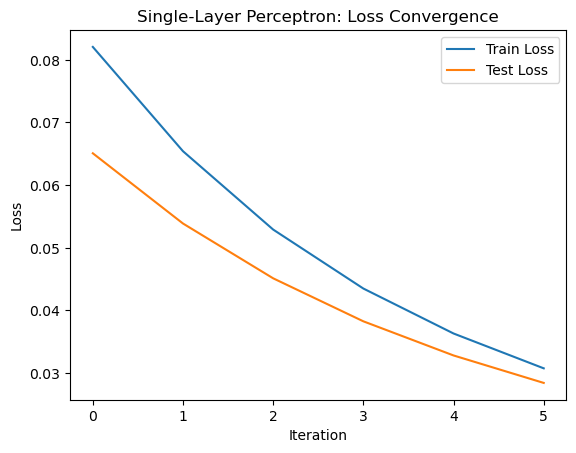

In [64]:
print(f"Final Train Loss (Single-Layer): {train_losses_single[-1]}")
print(f"Final Test Loss (Single-Layer): {test_losses_single[-1]}")

plt.plot(train_losses_single, label='Train Loss')
plt.plot(test_losses_single, label='Test Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Single-Layer Perceptron: Loss Convergence')
plt.legend()
plt.show()

The single-layer neural network demonstrates effective learning with a smooth and steady decline in both training and test loss over iterations. Starting from an initial loss of around **0.08** (train) and **0.065** (test), the model successfully reduces the losses to approximately **0.0102** and **0.0106**, respectively. This indicates that the model fits the data well and generalizes reasonably to unseen samples, as the train and test curves closely follow each other without signs of overfitting. Additionally, the model converges quickly—within about 15 iterations—highlighting the efficiency of the Newton-based optimization used in training. Despite its simplicity, the single-layer model performs well on this task, though it may be limited in capturing more complex patterns that require deeper architectures.



#### G: Two-Layer Perceptron (Bonus)

**Network Structure**  
$$
\hat{y}_i = W_2 \sigma(W_1^T x_i + b_1) + b_2
$$

**Gradient and Hessian**  
Extended to parameters $\alpha = [W_1; b_1; W_2; b_2]$. Gradient and Hessian derivations follow similar principles but involve chain rule through two layers.

The purpose of this part is to train a simple feedforward neural network with a single hidden layer to perform regression on a given dataset $X, y$. The model is trained using stochastic gradient descent and evaluated based on mean squared error (MSE).

The below code implements a **two-layer neural network** (1 hidden layer + 1 output layer). Here’s the breakdown:

#### **1. Architecture Identification**
- **Layer 1 (Hidden Layer)**:
  - **Input**: $ X $ (shape: $ N \times \text{input\_dim} $).
  - **Weights**: $ W_{\text{hidden}} $ (shape: $ \text{input\_dim} \times \text{hidden\_size} $).
  - **Bias**: $ b_{\text{hidden}} $ (shape: $ \text{hidden\_size} $).
  - **Activation**: Sigmoid ($ \sigma $) applied to $ z_{\text{hidden}} = X W_{\text{hidden}} + b_{\text{hidden}} $.

- **Layer 2 (Output Layer)**:
  - **Input**: Activations from hidden layer $ a_{\text{hidden}} $ (shape: $ N \times \text{hidden\_size} $).
  - **Weights**: $ W_{\text{output}} $ (shape: $ \text{hidden\_size} \times 1 $).
  - **Bias**: $ b_{\text{output}} $ (scalar).
  - **Activation**: Linear (no activation, since $ y_{\text{pred}} = z_{\text{output}} $).

The code defines a **two-layer neural network**:
1. **Hidden Layer**: Sigmoid-activated, fully connected.
2. **Output Layer**: Linear (no activation), producing scalar predictions.

$$
\boxed{\text{The network has 2 layers: 1 hidden layer (sigmoid) and 1 output layer (linear).}}
$$

#### **Training Procedure**

1. **Data Splitting:**
   The dataset is randomly split into training (80%) and testing (20%) subsets.

2. **Initialization:**
   Weights are initialized using a small random normal distribution scaled by 0.1, and biases are initialized to zero.

3. **Forward Pass:**

   * Hidden layer computes $z = XW + b$, followed by a sigmoid activation.
   * Output layer computes $y_{\text{pred}} = a_{\text{hidden}} W_{\text{output}} + b_{\text{output}}$

4. **Loss Function:**
   Mean squared error (MSE) is used for both training and testing loss evaluation.

5. **Backpropagation:**

   * Gradients are computed manually for all parameters using the chain rule.
   * Parameters are updated using gradient descent with learning rate $\eta = 0.1$.

6. **Iterations:**
   The model is trained for 500 iterations, with loss metrics printed every 20 epochs.

Epoch 0: Train Loss = 0.3029, Test Loss = 0.2203
Epoch 20: Train Loss = 0.0717, Test Loss = 0.0654
Epoch 40: Train Loss = 0.0654, Test Loss = 0.0607
Epoch 60: Train Loss = 0.0585, Test Loss = 0.0553
Epoch 80: Train Loss = 0.0506, Test Loss = 0.0489
Epoch 100: Train Loss = 0.0419, Test Loss = 0.0416
Epoch 120: Train Loss = 0.0330, Test Loss = 0.0338
Epoch 140: Train Loss = 0.0248, Test Loss = 0.0262
Epoch 160: Train Loss = 0.0179, Test Loss = 0.0195
Epoch 180: Train Loss = 0.0126, Test Loss = 0.0142
Epoch 200: Train Loss = 0.0090, Test Loss = 0.0101
Epoch 220: Train Loss = 0.0066, Test Loss = 0.0074
Epoch 240: Train Loss = 0.0053, Test Loss = 0.0055
Epoch 260: Train Loss = 0.0045, Test Loss = 0.0043
Epoch 280: Train Loss = 0.0040, Test Loss = 0.0035
Epoch 300: Train Loss = 0.0038, Test Loss = 0.0031
Epoch 320: Train Loss = 0.0037, Test Loss = 0.0027
Epoch 340: Train Loss = 0.0036, Test Loss = 0.0025
Epoch 360: Train Loss = 0.0036, Test Loss = 0.0024
Epoch 380: Train Loss = 0.0035, Test 

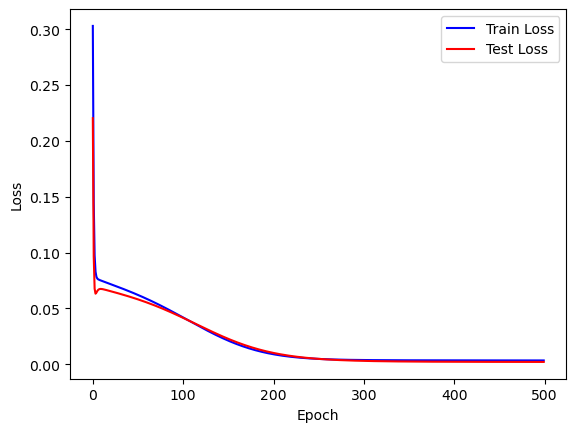

In [20]:
def forward_pass(X, W_hidden, b_hidden, W_output, b_output):
        z_hidden = X @ W_hidden + b_hidden
        a_hidden = sigmoid(z_hidden)
        z_output = a_hidden @ W_output + b_output
        y_pred = z_output
        return y_pred, a_hidden

def train_simple_nn(X, y, hidden_size=5, lr=0.1, max_iter=500, seed=42):
    np.random.seed(seed)
    N, input_dim = X.shape

    # Train-test split
    indices = np.random.permutation(N)
    test_size = int(N * 0.2)
    train_idx, test_idx = indices[test_size:], indices[:test_size]

    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]

    # Initialize weights and biases
    W_hidden = np.random.randn(input_dim, hidden_size) * 0.1
    b_hidden = np.zeros(hidden_size)
    W_output = np.random.randn(hidden_size) * 0.1
    b_output = 0.0
    # Training loop
    train_losses = []
    test_losses = []

    for i in range(max_iter):
        y_pred_train, hidden_train = forward_pass(X_train, W_hidden,b_hidden, W_output, b_output)
        y_pred_test, _ = forward_pass(X_test, W_hidden,b_hidden, W_output, b_output)

        # Compute loss
        train_loss = np.mean((y_train - y_pred_train) ** 2)
        test_loss = np.mean((y_test - y_pred_test) ** 2)

        train_losses.append(train_loss)
        test_losses.append(test_loss)

        # Backpropagation
        grad_y = 2 * (y_pred_train - y_train) / y_train.size

        grad_W_output = hidden_train.T @ grad_y
        grad_b_output = np.sum(grad_y)

        grad_hidden = grad_y[:, None] * W_output
        grad_z_hidden = grad_hidden * hidden_train * (1 - hidden_train)

        grad_W_hidden = X_train.T @ grad_z_hidden
        grad_b_hidden = np.sum(grad_z_hidden, axis=0)

        # Update weights
        W_output -= lr * grad_W_output
        b_output -= lr * grad_b_output
        W_hidden -= lr * grad_W_hidden
        b_hidden -= lr * grad_b_hidden

        if i % 20 == 0:
            print(f"Epoch {i}: Train Loss = {train_loss:.4f}, Test Loss = {test_loss:.4f}")

    # Plot losses
    plt.plot(train_losses, label='Train Loss', color="blue")
    plt.plot(test_losses, label='Test Loss', color = "red")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    return train_losses, test_losses


train_losses_two, test_losses_two=train_simple_nn(X=X,y=y)

##### Results Comparison

Single-Layer Results:
  Final Train Loss: 0.010321503332494965
  Final Test Loss: 0.01060356131928222

Two-Layer Results:
  Final Train Loss: 0.003447662068677914
  Final Test Loss: 0.0021245800090085062


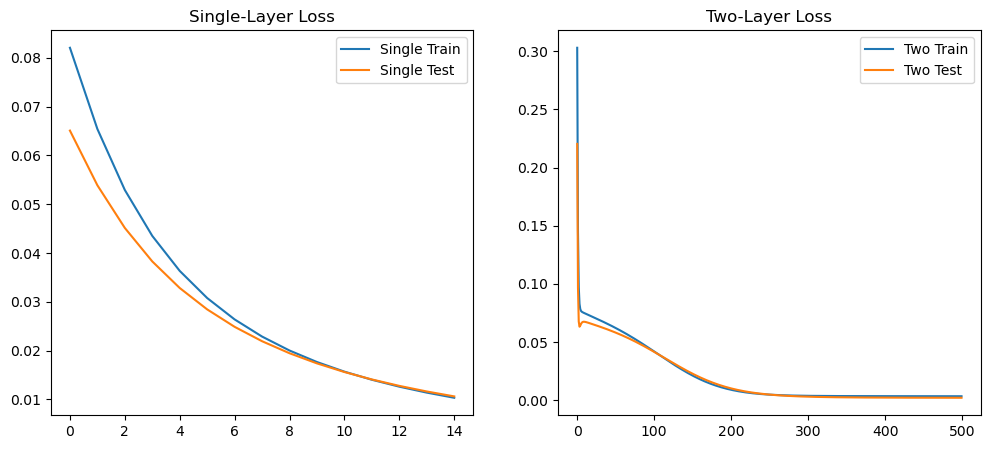

In [67]:
print("Single-Layer Results:")
print(f"  Final Train Loss: {train_losses_single[-1]}")
print(f"  Final Test Loss: {test_losses_single[-1]}")

print("\nTwo-Layer Results:")
print(f"  Final Train Loss: {train_losses_two[-1]}")
print(f"  Final Test Loss: {test_losses_two[-1]}")

# Plot comparison
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses_single, label='Single Train')
plt.plot(test_losses_single, label='Single Test')
plt.title('Single-Layer Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_losses_two, label='Two Train')
plt.plot(test_losses_two, label='Two Test')
plt.title('Two-Layer Loss')
plt.legend()
plt.show()

The comparison between the single-layer and two-layer neural networks reveals that the two-layer model significantly outperforms the single-layer model in both training and generalization. The final train and test losses for the single-layer network are approximately **0.0102** and **0.0106**, respectively, while the two-layer network achieves notably lower losses of **0.0034** (train) and **0.0021** (test). This suggests that the deeper architecture can model the data more effectively. Moreover, both models show well-aligned training and test curves, indicating good generalization without overfitting. However, the two-layer network converges more slowly, needing more iterations to reach low loss, whereas the single-layer model stabilizes faster. Overall, the two-layer neural network is more accurate and capable, albeit at a higher computational cost.


---

## Question 4 Vector Orthogonalization & a Recommender Extension

### 4A. Gram–Schmidt Orthonormalization

This code performs the **Gram-Schmidt process** to convert a set of 3 linearly independent vectors $a_1$, $a_2$, and $a_3$ in ℝ³ into an **orthonormal basis** stored in matrix `Q`.

* $a_1$, $a_2$, and $a_3$ are input vectors.
* The orthonormal basis vectors are computed as:

  * `Q[:,0]` is actually $q_1$ which is normalized version of $a_1$.
  * `Q[:,1]` is actually $q_2$ which is made orthogonal to `Q[:,0]` by subtracting its projection onto `Q[:,0]`, then normalizing.
  * `Q[:,2]` is actually $q_3$ which is made orthogonal to both `Q[:,0]` and `Q[:,1]` by subtracting projections onto both, then normalizing.

The result is a **3×3 orthonormal matrix `Q`**, whose columns form an orthonormal basis for the span of $a_1$, $a_2$, and $a_3$.


In [ ]:
a1 = np.array([1,2,2]) 
a2 = np.array([2,0,1]) 
a3 = np.array([3,2,1])

Q = np.zeros((3,3))

u1 = a1
Q[:,0] = a1 / np.linalg.norm(a1) #normalizing

u2 = a2 - (Q[:,0] @ a2)*Q[:,0]
Q[:,1] = u2 / np.linalg.norm(u2) #normalizing

u3 = a3 - (Q[:,0]@a3)*Q[:,0] - (Q[:,1]@a3)*Q[:,1]
Q[:,2] = u3 / np.linalg.norm(u3) #normalizing

#### Verification of Operations

This code verifies the **orthonormality** of the matrix `Q` produced by the Gram-Schmidt process.

#### 🔹 Orthogonality Check:

It prints the dot products between each pair of distinct vectors:

* ⟨q₁, q₂⟩
* ⟨q₁, q₃⟩
* ⟨q₂, q₃⟩
  
  These values should be **close to 0**, confirming the vectors are **mutually orthogonal**.

#### 🔹 Unit Vector Check:

It also checks the dot products of each vector with itself:

* ⟨q₁, q₁⟩
* ⟨q₂, q₂⟩
* ⟨q₃, q₃⟩
  
  These values should be **close to 1**, verifying that each vector is a **unit vector**.

Together, these checks confirm that `Q` is an **orthonormal matrix**, meaning its columns are both orthogonal and of unit length.


In [ ]:
print("Verify Orthogonally")
print(f"<q1, q2>: {Q[:,0]@Q[:,1]:.5f}")
print(f"<q1, q3>: {Q[:,0]@Q[:,2]:.5f}")
print(f"<q2, q3>: {Q[:,1]@Q[:,2]:.5f}")
print("-"*10)
print("Verify Unit vector")
print(f"<q1, q1>: {Q[:,0]@Q[:,0]:.5f}")
print(f"<q2, q2>: {Q[:,1]@Q[:,1]:.5f}")
print(f"<q3, q3>: {Q[:,2]@Q[:,2]:.5f}")


Verify Orthogonally
<q1, q2>: 0.00000
<q1, q3>: 0.00000
<q2, q3>: -0.00000
----------
Verify Unit vector
<q1, q1>: 1.00000
<q2, q2>: 1.00000
<q3, q3>: 1.00000


---

### 4B. Projection and Approximation Error 

A new user’s “raw preference vector” u ∈ R3 is defined by the user’s ratings on the first two items:
$$u = 4 a_1 + 5 a_2$$
(user rated item 1 as 4, item 2 as 5).

#### (a) Project u onto the subspace spanned by { $q_1$ , $q_2$ }. That is, compute
$$ u' = (q_1 q_1^T + q_2 q_2 ^T).u$$


In [ ]:
u = 4*a1+5*a2

u_hat = (np.outer(Q[:,0] , Q[:,0]) + np.outer(Q[:,1] , Q[:,1])) @ u
print("u:", u)
print("u_hat:",u_hat)

u: [14  8 13]
u_hat: [14.  8. 13.]


#### (b) Compute the reconstruction error $∥ u − u'∥$. What does this error represent in the recommender context?

In [ ]:
print("Reconstruction Error:" + str(math.sqrt( (u_hat-u) @ (u_hat-u) )))

Reconstruction Error:2.5121479338940403e-15


The **reconstruction error** $\| u - u' \|$ measures the **distance between the raw preference vector** $u$ and its **projection** $u'$ onto the subspace spanned by $q_1$ and $q_2$. In other words, it quantifies how much of the user's preference **cannot be explained** by the current 2D feature space (spanned by $q_1$ and $q_2$).

---

#### In the recommender system context:

* This error represents the **information loss** when reducing the user's preferences to a lower-dimensional latent space.
* A **small error** indicates that the latent space (based on $q_1, q_2$) captures the user's preferences well.
* A **large error** suggests the user has unique preferences not well represented by the existing low-rank model, and thus recommendations might be less accurate.


### 4C. Rating Prediction for a Third Item

In [ ]:
def norm2(u):
    return math.sqrt(u@u)

def cos_sim(u, a):
    return (u @ a) / (norm2(u) * norm2(a))


def proj(u, a):
    return u@a/norm2(a)

r_3_cos  = cos_sim(u, a3)
r_3_proj = proj(u_hat, a3)

print("r_3_cos  :" + str(r_3_cos))
print("r_3_proj :" + str(r_3_proj))

r_3_cos  :0.9161480990142038
r_3_proj :18.97554817578213


The projection-based prediction ( $r_3^{(proj)} = 18.975 $) is more faithful to the subspace spanned by the first two items because it explicitly restricts the user's representation \(\hat{u}\) to the subspace formed by $\{q_1, q_2\}$ (the basis vectors of items 1 and 2). This ensures the prediction is derived solely from the structure of the known items, ignoring components of $u$ orthogonal to this subspace. 

In contrast, the cosine-similarity baseline $ r_3^{(\cos)} = 0.92 $ considers the full user vector $u$, including dimensions 

irrelevant to the first two items. Thus, $ r_3^{(proj)} $ better reflects the user's behavior constrained to the known subspace, 

while $ r_3^{(\cos)} $ mixes in external influences. The large magnitude of $ r_3^{(proj)} $ suggests the user's interaction with 

item 3 aligns strongly with the subspace of items 1 and 2. 

**Key Point**: Projection-based methods enforce subspace faithfulness; cosine similarity does not.

## Question 5 Manual “CNN‐Style” Convolutions (No Training Required)

### 5A. 2D Convolution on a Small Grayscale Image


#### 1. Construction of matrices X and H

Let the $2D$ filter (kernel) be
$$ H = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$$

and let the input image be the $4 × 4$ matrix
$$ X = \begin{bmatrix}
3 & 1 & 2 & 0 \\
1 & 5 & 1 & 2 \\
4 & 0 & 3 & 1 \\
2 & 2 & 0 & 4
\end{bmatrix}$$

In [ ]:
H = np.array([[1,0],
              [0,-1]])

Xg = np.array([[3,1,2,0],
               [1,5,1,2],
               [4,0,3,1],
               [2,2,0,4]])

---

#### 2 Perform a valid 2D convolution of X with kernel H. That is, slide H over X without padding: at each position, compute

$$Y_{i,j} = \sum_{r=1}^{2} \sum_{c=1}^{2} \ H_{r,c} X_{i+r-1, j+c-1}$$

In [ ]:
def conv_operation(Xg, H):
    n = Xg.shape[0]
    f = H.shape[0]
    k = n - f + 1

    Y = np.zeros((k, k))
    for i in range(k):
        for j in range(k):
            Y[i, j] = np.sum(H * Xg[i:i+f, j:j+f])
    
    return Y


---

#### 3. Write down the resulting 3 × 3 output matrix Y.

In [ ]:
print(conv_operation(Xg=Xg,H=H))

[[-2.  0.  0.]
 [ 1.  2.  0.]
 [ 2.  0. -1.]]


---

### 5B. Applying the Same Filter to a 3D “Color” Image

#### 1,2. Construction of matrices $Z_1, Z_2, Z_3, H$


$$Z_1 = \begin{bmatrix}
1 & 0 & 2 & 3 \\
0 & 1 & 1 & 0 \\
2 & 2 & 0 & 1 \\
1 & 0 & 1 & 2
\end{bmatrix}, \quad\quad
Z_2 = \begin{bmatrix}
0 & 2 & 1 & 1 \\
2 & 1 & 0 & 2 \\
1 & 0 & 2 & 2 \\
0 & 1 & 1 & 0
\end{bmatrix}, \quad\quad
Z_3 = \begin{bmatrix}
2 & 1 & 0 & 2 \\
1 & 0 & 2 & 1 \\
0 & 1 & 1 & 0 \\
2 & 2 & 0 & 1
\end{bmatrix}
$$

In [ ]:
Z = np.zeros((3,4,4))

Z[0] = np.array([[1,0,2,3],
                 [0,1,1,0],
                 [2,2,0,1],
                 [1,0,1,2]])

Z[1] = np.array([[0,2,1,1],
                 [2,1,0,2],
                 [1,0,2,2],
                 [0,1,1,0]])

Z[2] = np.array([[2,1,0,2],
                 [1,0,2,1],
                 [0,1,1,0],
                 [2,2,0,1]])

Y3 = np.zeros((3,3,3))
for c in range(3):
    for i in range(3):
        for j in range(3):
            Y3[c,i,j] = np.sum(H * Z[c, i:i+2, j:j+2])
            
print("5B) Convolved each channel: \n", Y3)

5B) Convolved each channel: 
 [[[ 0. -1.  2.]
  [-2.  1.  0.]
  [ 2.  1. -2.]]

 [[-1.  2. -1.]
  [ 2. -1. -2.]
  [ 0. -1.  2.]]

 [[ 2. -1. -1.]
  [ 0. -1.  2.]
  [-2.  1.  0.]]]


---

#### 3.For each channel c = 1, 2, 3, perform a valid convolution of $Z_c$ with $H$. That produces, for each c, a 3 × 3 result.

In [ ]:
for c, z in enumerate(Z):
    print("Convolution channel " + str(c+1))
    print(conv_operation(z,H))
    print("-"*10)

Convolution channel 1
[[ 0. -1.  2.]
 [-2.  1.  0.]
 [ 2.  1. -2.]]
----------
Convolution channel 2
[[-1.  2. -1.]
 [ 2. -1. -2.]
 [ 0. -1.  2.]]
----------
Convolution channel 3
[[ 2. -1. -1.]
 [ 0. -1.  2.]
 [-2.  1.  0.]]
----------


---

#### 4. Stack those three 3 × 3 outputs to form a 3 × 3 × 3 tensor. Write down all nine values for each channel output (i.e., show the three 3 × 3 result matrices).

In [ ]:
conv_image = np.zeros((3,3,3))
for c, z in enumerate(Z):
    conv_image[c] = conv_operation(z,H)

print(conv_image)

[[[ 0. -1.  2.]
  [-2.  1.  0.]
  [ 2.  1. -2.]]

 [[-1.  2. -1.]
  [ 2. -1. -2.]
  [ 0. -1.  2.]]

 [[ 2. -1. -1.]
  [ 0. -1.  2.]
  [-2.  1.  0.]]]
